# Mth 416 - Hw5

## Exercise 1

<!-- 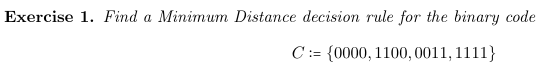 -->


Using remark 5.1.18 we can create a MD-rule by mapping each binary number to a codeword which minimizes the distance between the two. Since $|\mathbb{B}^4|=16$, we will map each codeword to itself and must minimize the distance between each of the other twelve terms and our codewords.

This is small enough that we can do this exhaustively.

In [2]:
def find_hamming_distance(binary1, binary2):
    return (binary1 ^ binary2).bit_count()

def pair_with_min_dist(binary: int, code: list[int], size=4):
    #check distance to each codeword
    hamming_distances = []
    for codeword in code:
        hamming_distances.append(find_hamming_distance(binary, codeword))
    
    #return the nearest codeword 
    match = code[hamming_distances.index(min(hamming_distances))] 

    #pair codeword with nearest
    return {format(binary, f'#0{size+2}b')[2:] : format(match, f'#0{size+2}b')[2:] }

code = (0b0000, 0b1100, 0b0011, 0b1111)
MD_rule = dict()
for i in range(0, 16):
    MD_rule = MD_rule | pair_with_min_dist(i, code)

MD_rule

{'0000': '0000',
 '0001': '0000',
 '0010': '0000',
 '0011': '0011',
 '0100': '0000',
 '0101': '0000',
 '0110': '0000',
 '0111': '0011',
 '1000': '0000',
 '1001': '0000',
 '1010': '0000',
 '1011': '0011',
 '1100': '1100',
 '1101': '1100',
 '1110': '1100',
 '1111': '1111'}

Since each binary string is matched with the codeword nearest to it, remark 5.1.18 shows that this is a MD-rule. A similar rule would be 'for $x\in \mathbb{B}^4$, replace $x_2$ with $x_1$ and $x_4$ with $x_3$, but I don't know how to check if this is an MD-rule, so the algorithm was easier for me.

## Exercise 2

<!-- 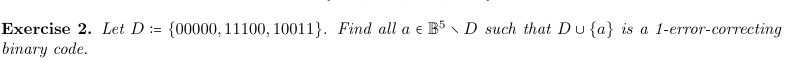 -->

In order for a code $D$ to be 1-error-correcting, the minimum distance between all codewords $\delta(D)$ must be greater than or equal to $3$ (def 5.1.17)

We can check this exhaustively, but note that each $a$ must have three differences from all three codewords. We can represent each choice of zero or one for each of the five binary digits as contributing distance to one or more of the above codewords. Below, we represent a list of the opposite of each value.



$$
a = a_1a_2a_3a_4a_5 \\
a_1 \rightarrow [1, 0, 0] \\
a_2 \rightarrow [1, 0, 1] \\
a_3 \rightarrow [1, 0, 1] \\
a_4 \rightarrow [1, 1, 0] \\
a_5 \rightarrow [1, 1, 0] \\
$$

The table above shows values $a$ must have to differ from the codewords, with $C_1, C_2, C_3$ for each column, respectively. For an answer $a$ to be successful, it must have three or more values from each column of the table. It is likely there is some linear algebra process which can outright reveal the answer, but I'm not sure what that would be, so instead we will solve this like a typical logic puzzle.

(#1) Due to the first codeword 00000, any answer $a$ must have three or more 1's. Since there must be at least one 0, there are max four 1's. 

$\text{sum}(a)\in \{3, 4\}$

Of these 1's, at least one must be $a_4$ or $a_5$, since $a_1a_2a_3=111$ fails for the second column. One or more of the 1's must be in $a_2$ or $a_3$ for the same reason. 

If $a_4a_5 = 11$, the remaining terms must satisfy column 3 $a_1a_2a_3 = 011$, so any result with odd $a_2a_3a_4a_5$ is not accepted.

If $a_2a_3$ and $a_4a_5$ are both odd, (#1) says that $a_1=1$, which results in column 2 and 3 failing.

From these conditions, only one possible result exists: $a=01111$, which has distances (4, 3, 3), respectively.

In [22]:
test = 0b01111
print((
find_hamming_distance(test, 0b00000),
find_hamming_distance(test, 0b11100),
find_hamming_distance(test, 0b10011),
))

(4, 3, 3)


## Exercise 3

<!-- 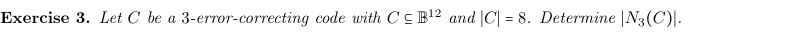 -->

$N_3(C)$ is all terms with hamming distance 3 or less from a codeword

Because $C$ is $3$-error-correcting, the neighborhood of size 3 for each codeword does not overlap. Each term with a hamming distance three or less to a codeword belongs to it's hamming sphere and no other. As such, we can find the number of elements in one hamming sphere of radius 3 and multiply by $8$ to get the answer. 

We can find the number of values in a hamming sphere using $\binom{n}{k}$, where $n$ is the size of the binary string and $k$ is the number of bits which are flipped (hamming distance).

For $c \in C$:
$$
|N_3(c)|  = \binom{12}{0} + \binom{12}{1} + \binom{12}{2} + \binom{12}{3} = 299 \\
|N_3(C)| = 8|N_3(c)| = 2392
$$

## Exercise 4

<!-- 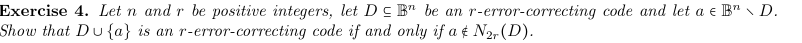 -->

Show $D \cup \{a\}$ is r-error correcting <-> $a \not \in N_{2r}(D)$

$\Rightarrow: r$-error-correcting implies $a \not \in N_{2r}(D)$

$r$-error correcting implies $\delta(D\cup \{a\}) \geq 2r+1$. For each $c \in D$ we have $d(a, c) \geq 2r+1$. <br>Since $a \in N_{2r}(c) \leftrightarrow d(a,d) \leq 2r$, we have

$$
d(a, c) \geq 2r + 1 >2r\ \forall c \in D \\
a \not \in N_{2r}(c)\ \forall c \in D \\
a \not \in N_{2r}(D)
$$

$\Leftarrow: a \not \in N_{2r}(D)$ implies $r$-error-correcting

$$
a \not \in N_{2r}(D) \Rightarrow d(a, c) > 2r\ \forall c \in D \\
\Rightarrow d(a,c) \geq 2r+1\ \forall c \in D
$$
Which comes from $d(a, c)\in \mathbb{N}$. Since $D$ is $r$-error-correcting, $\delta(D\cup \{a\}) \geq 2r+1$ and is $r$-error-correcting by definition

## Exercise 5

<!-- 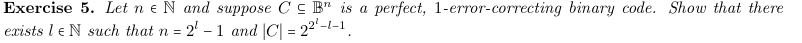 -->

Perfect 1-error-correcting: $|C|\binom{n}{1}=2^n$

$$
|C|(1+n)=2^n \\
|C| = \frac{2^n}{1+n}
$$
Since $|C|,(1+n)\in \mathbb{Z^+}$, $n+1$ must divide $2^n$ evenly. This occurs for $n=2^l -1$ for some $l \in \mathbb{N}$, since $2^n$ is divisible by powers of 2.
$$
n = 2^l + 1 \rightarrow |C|=\frac{2^n}{2^l} \checkmark \\
n+1 = 2^l \\
|C| = \frac{2^{2^l-1}}{2^l} = 2^{2^l-l-1}
$$

## Exercise 6

<!-- 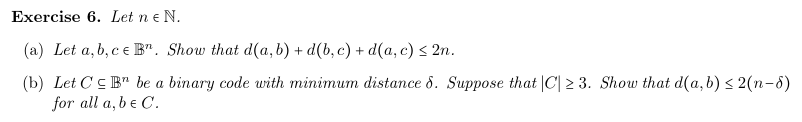 -->


(a)<br>
Using subscripts to represent symbols in a message, each $a_i, b_i, c_i \in \{0, 1\}, 1\leq i \leq n$. As such, either all three are the same, or two are the same.

$a_ib_ic_i = {000, 111}$ or two are the same and one is different (either two $0$ or two $1$)

So $d(a_i,b_i) = d(b_i,c_i) = d(a_i,c_i) = 0$, or one of the distances is zero. So $d(a_i,b_i) + d(b_i,c_i) + d(a_i,c_i) \leq 2$.

The hamming distance between two phrases is the sum of the distance between each symbol, so

$$
d(a,b) + d(b,c) + d(a,c) = \sum_{i=1}^n d(a_i,b_i) + d(b_i,c_i) + d(a_i,c_i) \leq \sum_{i=1}^n 2 = 2n
$$

(b)<br>
Since $|C| \geq 3$, there is some $c\in C, c\neq a,b $ with the property

$$
d(a, c) \geq \delta \\
d(b, c) \geq \delta
$$

From this we can use our result from part (a)

$$
d(a,b) + d(b,c) + d(a,c) = d(a,b) + 2\delta \leq 2n \\
d(a,b) \leq 2n - 2\delta \\
d(a,b) \leq 2(n-\delta)
$$

## Exercise 7

<!-- 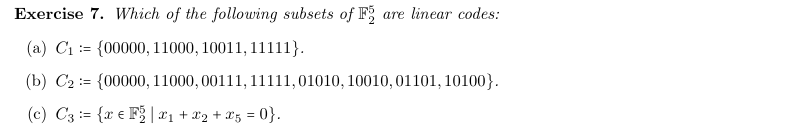 -->

Remember $\mathbb{F}_2^5$ is $\mathbb{B}^5$ with addition and multiplication

For each code, we must check if they are a subspace i.e. it satisfies Definition 6.1.6

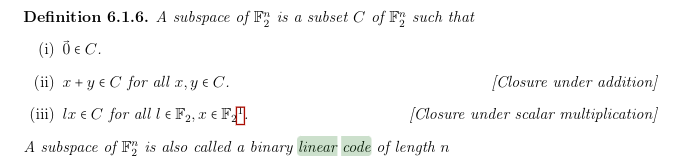

(a) this fails (ii): 

$$
11000+11111 = 00111 \not \in C_1
$$

(b) again, fails (ii)

$$
01010 + 11111 = 10101 \not \in C_2
$$

(c) For a generic element $x \in C_3$, we have $00x_3x_40$ with $x_3, x_4 \in \{0,1\}$. This means the set contains

$$
C_3 = {00000, 00100, 00010, 00110} \\
\vec 0 = 00000 
$$
Any item $x\in \mathbb{F}_2^5$ added to itself is $\vec 0$, and $x + \vec 0 = x$, so we can check addition for the remaining terms.

$$
00100+00010=00110\\
00010+00110=00100\\
00100+00110=00010
$$
As such, this has closure under addition and is a subspace (linear code)